# R Notation

Pythonistas: I'm really sorry about this. No, it isn't my fault. I'm still sorry.

The most common way to pull things out of dataframes is with square brackets. For dataframe `df` we can pull out the value from a specific cell at **row a, column b** with `df[a, b]` - pulling one single value from a cell isn't something we're going to do very often, but everything we're about to talk about makes much more sense once you understand that the **spot before the comma is for rows, and the spot after the comma is for columns.**

We have several tools available for pulling items (or vectors!) out of dataframes:
* Positive integers (the row/column corresponding to the integer), using \[\] notation
* Negative integers (everything _except_ the row/column corresponding to the integer), using \[\] notation
* Blank spaces (everything, all of it, in that dimension), using \[\] notation
* Logical values (we're going to skip over this until it gets useful)
* Names, via both \$ notation and \[\] notation.

First, let's remind ourselves how to pull in a dataframe. 

In [1]:
clp_wifi <- read.csv("clp_wifi.csv", stringsAsFactors=FALSE)
head(clp_wifi)

CLPID,Name,Year,Month,WifiSessions,WifiMinutes
CLP01,ALLEGHENY LIBRARY,2016,1,1037,148513
CLP01,ALLEGHENY LIBRARY,2016,2,1064,150948
CLP01,ALLEGHENY LIBRARY,2016,3,949,129484
CLP01,ALLEGHENY LIBRARY,2016,4,934,136196
CLP01,ALLEGHENY LIBRARY,2016,5,1018,135793
CLP01,ALLEGHENY LIBRARY,2016,6,1163,169426


## Getting columns from a data frame

### Numeric indexing to include certain columns

If you know the position of the column(s) you want, you can get a column using numeric indexing with `df[ , numVec]`:

In [2]:
# column 4, with a reminder that we start counting at 1 not 0
col4 <- clp_wifi[ , 4] # the space means "all rows"
head(col4)

[1] 1 2 3 4 5 6

In [4]:
# columns 5 and 6
col5_6 <- clp_wifi[ , 5:6]
# same:
# col5_6 <- clp_wifi[ , c(5, 6)]
head(col5_6)

WifiSessions,WifiMinutes
1037,148513
1064,150948
949,129484
934,136196
1018,135793
1163,169426


### Numeric indexing to _exclude_ certain columns

If you know the position of the column(s) you **don't want** you can also get that with numeric indexing, using `df[ , -numVec]`

In [5]:
# what if we don't want the name of the library?
not_col_2 <- clp_wifi[ , -2]
head(not_col_2)

CLPID,Year,Month,WifiSessions,WifiMinutes
CLP01,2016,1,1037,148513
CLP01,2016,2,1064,150948
CLP01,2016,3,949,129484
CLP01,2016,4,934,136196
CLP01,2016,5,1018,135793
CLP01,2016,6,1163,169426


### Addressing columns by name

OK, but these are data frames. Often&mdash;dare I say, _usually_&mdash;they will have named columns. We can make use of that. 

First, here's how you do this with brackets: `df[ , "colName"]` - yeah, you want those quotes, and yeah, you want that comma (what I did last week shouldn't have worked, properly speaking, oops).

In [16]:
# give us the number of wifi sessions!

sessions <- clp_wifi[ , "WifiSessions"]
head(sessions)
class(sessions)

[1] 1037 1064  949  934 1018 1163

[1] "integer"

In [17]:
# give us both of the last two columns

# note the vector notation!
last_two_columns <- clp_wifi[ , c("WifiSessions", "WifiMinutes")]
head(last_two_columns)

# OK, but also, note:
class(last_two_columns)

WifiSessions,WifiMinutes
1037,148513
1064,150948
949,129484
934,136196
1018,135793
1163,169426


[1] "data.frame"

OK, but. Let's say that you only want one column, but you WANT it to be a data frame. (It could happen!) Easy enough:

`df[ , "colName", drop = FALSE]`

In [34]:
sessions_df <- clp_wifi[ , "WifiSessions", drop=FALSE]
head(sessions_df)
class(sessions_df)

WifiSessions
1037
1064
949
934
1018
1163


[1] "data.frame"

OK, so, that's how we get a column with brackets. Great! As you already know (but I'm going to tell you again anyway), there's another option available for us to pull one column out of a dataframe: `df$colName` - note that there are no quotation marks there

In [18]:
# OK, now let's pull out just the WifiMinutes:

mins <- clp_wifi$WifiMinutes
head(mins)
class(mins)  

[1] 148513 150948 129484 136196 135793 169426

[1] "integer"

### Doing things with columns once we've retrieved them

What's the average number of minutes per wifi session at a library in Pittsburgh?

Which libraries are in this data set?

What years does it cover?

All questions we can answer with just a couple of lines of code!

In [27]:
# What's the average number of minutes per wifi session at a library in Pittsburgh?

# we pulled out the vector of minutes above! 
# mins <- clp_wifi$WifiMinutes

# also, the vector of wifi sessions:
# sessions <- clp_wifi[ , "WifiSessions"]

# bit naive, assumes we have data in every row,
# but it's a decent approximation probably
avg <- sum(mins)/sum(sessions)
avg

[1] 132.6116

In [30]:
# Which libraries are in this data set?
# (Bonus) How many are there?

lib_names <- unique(clp_wifi$Name)
lib_names
length(lib_names)

[1] "ALLEGHENY LIBRARY"                             
 [2] "BEECHVIEW LIBRARY"                             
 [3] "BROOKLINE LIBRARY"                             
 [4] "CARRICK LIBRARY"                               
 [5] "DOWNTOWN & BUSINESS LIBRARY"                   
 [6] "EAST LIBERTY LIBRARY"                          
 [7] "HAZELWOOD LIBRARY"                             
 [8] "HILL DISTRICT LIBRARY"                         
 [9] "HOMEWOOD LIBRARY"                              
[10] "KNOXVILLE LIBRARY"                             
[11] "LAWRENCEVILLE LIBRARY"                         
[12] "LIBRARY FOR THE BLIND & PHYSICALLY HANDICAPPED"
[13] "MAIN (OAKLAND) LIBRARY"                        
[14] "MOUNT WASHINGTON LIBRARY"                      
[15] "SHERADEN LIBRARY"                              
[16] "SOUTH SIDE LIBRARY"                            
[17] "SQUIRREL HILL LIBRARY"                         
[18] "WEST END LIBRARY"                              
[19] "WOODS RUN LIBRARY"

[1] 19

In [31]:
# Which years does this data set cover?

#same trick, actually
unique(clp_wifi$Year)

[1] 2016 2017 2018

## Getting rows from data frames

A row corresponds (usually, nearly always) to a specific observation. Sometimes you're going to want to be able to pull out one row (or a set of rows) to examine what's happening in them. 

### By position with numeric indexing

Unsurprisingly, it's just like above, only you put your number in the first spot instead of the second: `df[numVec, ]` - again, the space in the column spot tells R "I want all the columns in this row"

In [33]:
row1 <- clp_wifi[1, ]
row1
class(row1)

CLPID,Name,Year,Month,WifiSessions,WifiMinutes
CLP01,ALLEGHENY LIBRARY,2016,1,1037,148513


[1] "data.frame"

It makes a certain amount of sense that we don't have a vector, since data types will vary across columns in a data frame, and a single vector can't contain multiple data types. 

It means nothing changes when we grab multiple rows:

In [35]:
first_10 <- clp_wifi[1:10, ]
first_10

CLPID,Name,Year,Month,WifiSessions,WifiMinutes
CLP01,ALLEGHENY LIBRARY,2016,1,1037,148513
CLP01,ALLEGHENY LIBRARY,2016,2,1064,150948
CLP01,ALLEGHENY LIBRARY,2016,3,949,129484
CLP01,ALLEGHENY LIBRARY,2016,4,934,136196
CLP01,ALLEGHENY LIBRARY,2016,5,1018,135793
CLP01,ALLEGHENY LIBRARY,2016,6,1163,169426
CLP01,ALLEGHENY LIBRARY,2016,7,1352,208802
CLP01,ALLEGHENY LIBRARY,2016,8,1436,219842
CLP01,ALLEGHENY LIBRARY,2016,9,1222,180409
CLP01,ALLEGHENY LIBRARY,2016,10,1086,156120


### Leaving out rows with negative indices

Again, no surprises here; it works just like with columns, except we always get a data frame.

In [37]:
all_but_first_10 <- clp_wifi[-(1:10), ]
head(all_but_first_10)

,CLPID,Name,Year,Month,WifiSessions,WifiMinutes
11,CLP01,ALLEGHENY LIBRARY,2016,11,1038,141003
12,CLP01,ALLEGHENY LIBRARY,2016,12,925,140230
13,CLP01,ALLEGHENY LIBRARY,2017,1,1070,167159
14,CLP01,ALLEGHENY LIBRARY,2017,2,1029,148976
15,CLP01,ALLEGHENY LIBRARY,2017,3,1400,118952
16,CLP01,ALLEGHENY LIBRARY,2017,4,1725,155280


### Getting rows by name 

This isn't something you'll necessarily do every day, but some datasets do have named rows. I'd feel remiss if I left it out.

The format is unsurprising: `df["rowName", ]` or `df[c("rowName1", "rowName2", ...), ]`

Let's give our dataframe some row names. 

#### Slight detour: for loops in R

What if I also show you how to write a for loop in R, while we're at it?

General format of a for loop in R:
```R
for (iterVar in numVec) {
  # do something
}
```

In [56]:
# I want my names to take the form Year_Month_CLPID

# we start with an empty vector
ids <- vector()

# we're going to loop through each row of the frame
for (i in 1:length(clp_wifi$Month)) {
    # the row name will be a string, so we need our numerics as characters
    year <- as.character(clp_wifi$Year[i])
    month <- as.character(clp_wifi$Month[i])
    # I want all my names to be the same length, so I preappend zeros as needed
    if (clp_wifi$Month[i] < 10) {
        month <- paste("0", month, sep = "")
    }
    # combining the strings with underscores between them
    id <- paste(year, month, clp_wifi$CLPID[i], sep = "_")
    
    # and then we append each new id onto the vector of IDs
    ids <- c(ids, id)
}

# having my vector of row names, I now need to add it to my dataframe
row.names(clp_wifi) <- ids
head(clp_wifi)

,CLPID,Name,Year,Month,WifiSessions,WifiMinutes
2016_01_CLP01,CLP01,ALLEGHENY LIBRARY,2016,1,1037,148513
2016_02_CLP01,CLP01,ALLEGHENY LIBRARY,2016,2,1064,150948
2016_03_CLP01,CLP01,ALLEGHENY LIBRARY,2016,3,949,129484
2016_04_CLP01,CLP01,ALLEGHENY LIBRARY,2016,4,934,136196
2016_05_CLP01,CLP01,ALLEGHENY LIBRARY,2016,5,1018,135793
2016_06_CLP01,CLP01,ALLEGHENY LIBRARY,2016,6,1163,169426


In [64]:
# now that we have given our rows names :), let's pull out some rows by name

# January 2018 in Squirrel Hill 
clp_wifi["2018_01_CLP17", ]

# the first quarter of 2018 in Squirrel Hill
clp_wifi[c("2018_01_CLP17", "2018_02_CLP17", "2018_03_CLP17"), ]

,CLPID,Name,Year,Month,WifiSessions,WifiMinutes
2018_01_CLP17,CLP17,SQUIRREL HILL LIBRARY,2018,1,4574,628896


,CLPID,Name,Year,Month,WifiSessions,WifiMinutes
2018_01_CLP17,CLP17,SQUIRREL HILL LIBRARY,2018,1,4574,628896
2018_02_CLP17,CLP17,SQUIRREL HILL LIBRARY,2018,2,5022,696437
2018_03_CLP17,CLP17,SQUIRREL HILL LIBRARY,2018,3,5427,752002


Now, whether we're discussing rows or columns, there are some rules. We can't go mixing positive and negative indices. It isn't allowed.

In [38]:
clp_wifi[c(-1, 2, 3), ]

ERROR: Error in xj[i]: only 0's may be mixed with negative subscripts


Speaking of zeroes, the book included them as if they're some kind of valid thing, but then freely admitted that they're useless. Let's go ahead and try out some zeroes, yeah?

In [39]:
clp_wifi[0, ]

CLPID,Name,Year,Month,WifiSessions,WifiMinutes


In [40]:
clp_wifi[, 0]

Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
"number of columns of result is not a multiple of vector length (arg 2)"

1  
2  
3  
4  
5  
6  
7  
8  
9  
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
...
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532

In [42]:
print(clp_wifi[0, 0])
# don't forget print() exists; sometimes we get more information that way

data frame with 0 columns and 0 rows


## Pulling together _some_ rows and _some_ columns

Sometimes we don't want the entire huge dataframe we've been given. We can subset it down to the data we find useful, combining our methods for choosing rows with our methods for choosing columns.

In [72]:
# what if we just want the first 25 rows, and only WifiSessions and WifiMinutes?

clp_wifi[1:25, c("WifiSessions", "WifiMinutes")]

,WifiSessions,WifiMinutes
2016_01_CLP01,1037,148513
2016_02_CLP01,1064,150948
2016_03_CLP01,949,129484
2016_04_CLP01,934,136196
2016_05_CLP01,1018,135793
2016_06_CLP01,1163,169426
2016_07_CLP01,1352,208802
2016_08_CLP01,1436,219842
2016_09_CLP01,1222,180409
2016_10_CLP01,1086,156120


(And here, Coral gets a bit ahead of themself, so that you have something interesting to do for homework.)

We can pull data from frames with conditionals. We'll do a lot of this next week, but let's do just a little of it this week, as a treat.

Say we only want library name, month, sessions, and minutes from 2016, for instance. We can do that.

In [90]:
#minutes_in_2016 <- clp_wifi$WifiMinutes[clp_wifi$Year == 2016]
data_from_2016 <- clp_wifi[clp_wifi$Year == 2016, c("Name", "Month", "WifiSessions", "WifiMinutes")]

# confirming
head(data_from_2016)
tail(data_from_2016)

,Name,Month,WifiSessions,WifiMinutes
2016_01_CLP01,ALLEGHENY LIBRARY,1,1037,148513
2016_02_CLP01,ALLEGHENY LIBRARY,2,1064,150948
2016_03_CLP01,ALLEGHENY LIBRARY,3,949,129484
2016_04_CLP01,ALLEGHENY LIBRARY,4,934,136196
2016_05_CLP01,ALLEGHENY LIBRARY,5,1018,135793
2016_06_CLP01,ALLEGHENY LIBRARY,6,1163,169426


,Name,Month,WifiSessions,WifiMinutes
2016_07_CLP19,WOODS RUN LIBRARY,7,910,121013
2016_08_CLP19,WOODS RUN LIBRARY,8,936,115524
2016_09_CLP19,WOODS RUN LIBRARY,9,787,113217
2016_10_CLP19,WOODS RUN LIBRARY,10,690,101788
2016_11_CLP19,WOODS RUN LIBRARY,11,766,119559
2016_12_CLP19,WOODS RUN LIBRARY,12,538,78865


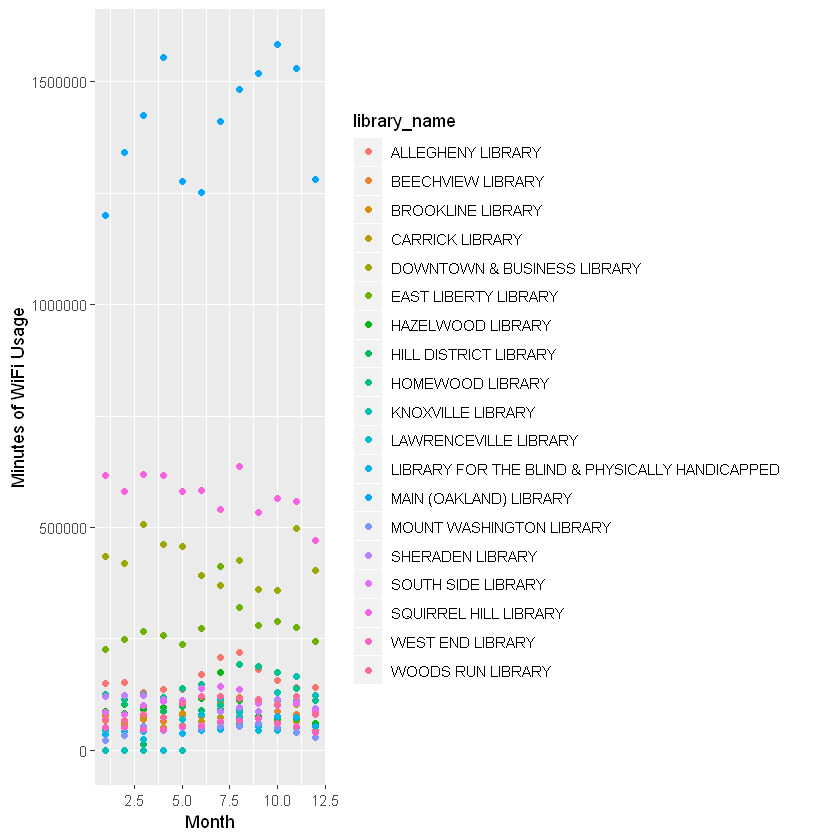

In [97]:
library_name <- data_from_2016$Name
library(ggplot2)
qplot(data_from_2016$Month, data_from_2016$WifiMinutes, color=library_name, xlab="Month", ylab="Minutes of WiFi Usage")